In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
# Read data , data downloaded from Kaggle
path = 'D:\\MachineLearninig\\Internship-Neevas\\archive\\student_scores.csv'
data = pd.read_csv(path, header=None, names=['Hours', 'Scores'])

In [39]:
# Ensure columns are numeric
data['Hours'] = pd.to_numeric(data['Hours'], errors='coerce')
data['Scores'] = pd.to_numeric(data['Scores'], errors='coerce')


In [63]:
# Drop rows with NaN values
data = data.dropna()
# Show data details
print('data = \n', data.head(10))
print('**************************************')
print('data.describe = \n', data.describe())
print('**************************************')

data = 
     Ones  Hours  Scores
1      1    2.5    21.0
2      1    5.1    47.0
3      1    3.2    27.0
4      1    8.5    75.0
5      1    3.5    30.0
6      1    1.5    20.0
7      1    9.2    88.0
8      1    5.5    60.0
9      1    8.3    81.0
10     1    2.7    25.0
**************************************
data.describe = 
        Ones      Hours     Scores
count  25.0  25.000000  25.000000
mean    1.0   5.012000  51.480000
std     0.0   2.525094  25.286887
min     1.0   1.100000  17.000000
25%     1.0   2.700000  30.000000
50%     1.0   4.800000  47.000000
75%     1.0   7.400000  75.000000
max     1.0   9.200000  95.000000
**************************************


<Axes: xlabel='Hours', ylabel='Scores'>

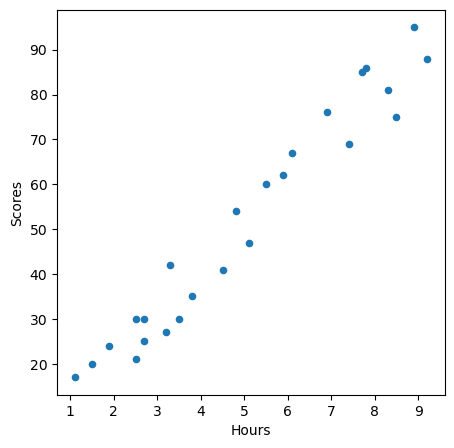

In [65]:
# Draw data
data.plot(kind='scatter', x='Hours', y='Scores', figsize=(5, 5))

In [71]:
# Add a column of ones for the intercept term
data.insert(0, 'Ones', 1)


ValueError: cannot insert Ones, already exists

In [69]:
# Separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1].values  # Convert to numpy array
y = data.iloc[:, cols-1].values    # Convert to numpy array


In [49]:
# Convert to numpy matrices
X = np.matrix(X)
y = np.matrix(y).T
theta = np.matrix([0, 0]).T  # Initial theta should be (2, 1)


In [51]:
# Cost function
def computeCost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = X @ theta  # Compute predictions
    errors = predictions - y  # Compute errors
    squared_errors = np.power(errors, 2)  # Square the errors
    return np.sum(squared_errors) / (2 * m)  # Compute and return the cost

print('computeCost(X, y, theta) = ', computeCost(X, y, theta))

computeCost(X, y, theta) =  nan


In [53]:
# Gradient Descent function
def gradientDescent(X, y, theta, alpha, iters):
    m = len(y)
    cost = np.zeros(iters)
    
    for i in range(iters):
        predictions = X @ theta  # Compute predictions
        errors = predictions - y  # Compute errors
        
        # Update theta
        gradient = (X.T @ errors) / m
        theta = theta - alpha * gradient
        
        # Compute cost
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost
        

In [55]:

# Initialize variables for learning rate and iterations
alpha = 0.01
iters = 100

In [57]:


# Perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

print('g = ', g)
print('cost = ', cost[0:50])
print('computeCost = ', computeCost(X, y, g))

g =  [[nan]
 [nan]]
cost =  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
computeCost =  nan


Text(0.5, 1.0, 'Hours vs. Predicted Scores')

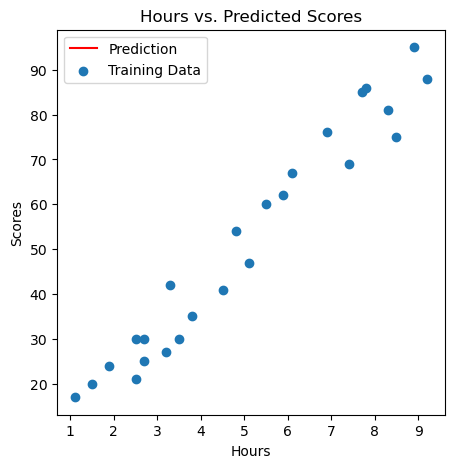

In [59]:

# Get the best fit line
x = np.linspace(data['Hours'].min(), data['Hours'].max(), 100)
f = g[0, 0] + (g[1, 0] * x)

# Draw the line
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Hours'], data['Scores'], label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Hours')
ax.set_ylabel('Scores')
ax.set_title('Hours vs. Predicted Scores')


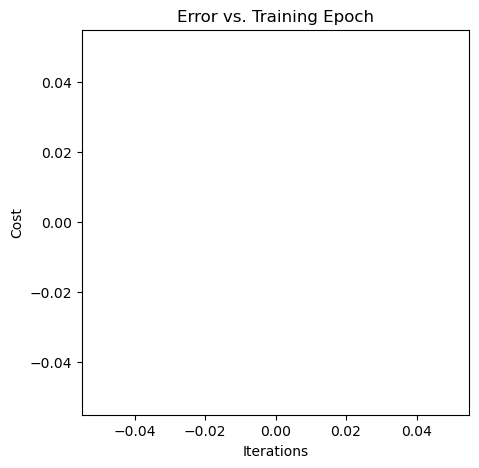

In [61]:

# Draw error graph
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()


data = 
     Hours  Scores
1     2.5    21.0
2     5.1    47.0
3     3.2    27.0
4     8.5    75.0
5     3.5    30.0
6     1.5    20.0
7     9.2    88.0
8     5.5    60.0
9     8.3    81.0
10    2.7    25.0
11    7.7    85.0
12    5.9    62.0
13    4.5    41.0
14    3.3    42.0
15    1.1    17.0
16    8.9    95.0
17    2.5    30.0
18    1.9    24.0
19    6.1    67.0
20    7.4    69.0
21    2.7    30.0
22    4.8    54.0
23    3.8    35.0
24    6.9    76.0
25    7.8    86.0
**************************************
data.describe = 
            Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
**************************************
computeCost(X, y, theta) =  1632.02
**************************************
g =  [[1.75456388]
 [9.89349329]]
cost =  [761.3462156  359.34090664 173.72794369  88.02707215  48.4

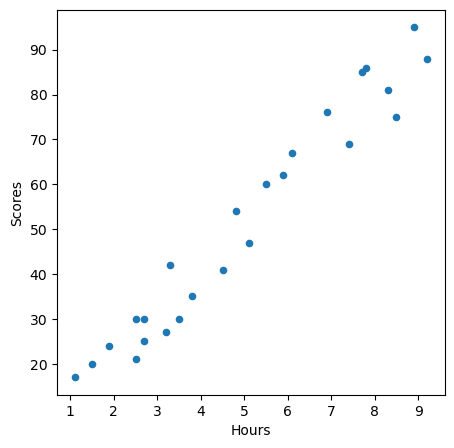

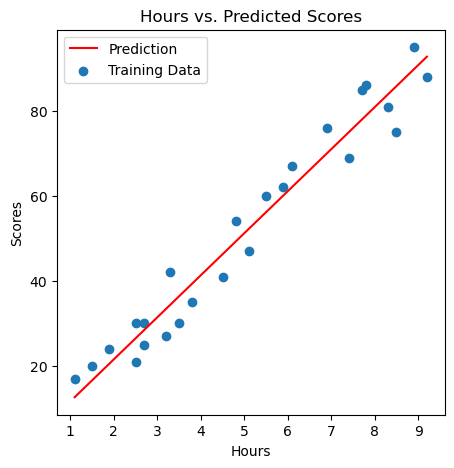

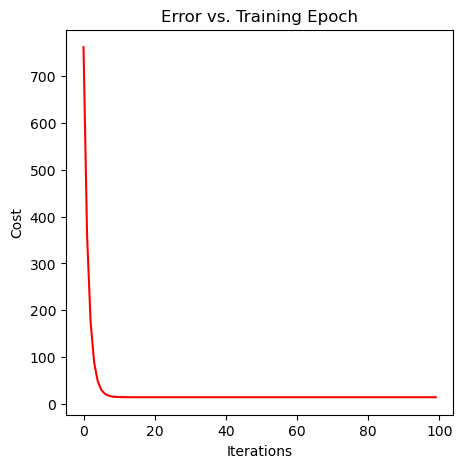

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read data
path = 'D:\\MachineLearninig\\Internship-Neevas\\archive\\student_scores.csv'
data = pd.read_csv(path, header=None, names=['Hours', 'Scores'])

# Ensure columns are numeric
data['Hours'] = pd.to_numeric(data['Hours'], errors='coerce')
data['Scores'] = pd.to_numeric(data['Scores'], errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Show data details
print('data = \n', data.head(100))
print('**************************************')
print('data.describe = \n', data.describe())
print('**************************************')

# Draw data
data.plot(kind='scatter', x='Hours', y='Scores', figsize=(5, 5))

# Add a column of ones for the intercept term
data.insert(0, 'Ones', 1)

# Separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1].values  # Convert to numpy array
y = data.iloc[:, cols-1].values    # Convert to numpy array

# Convert to numpy matrices
X = np.matrix(X)
y = np.matrix(y).T
theta = np.matrix([0, 0]).T  # Initial theta should be (2, 1)

# Cost function
def computeCost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = X @ theta  # Compute predictions
    errors = predictions - y  # Compute errors
    squared_errors = np.power(errors, 2)  # Square the errors
    return np.sum(squared_errors) / (2 * m)  # Compute and return the cost

print('computeCost(X, y, theta) = ', computeCost(X, y, theta))
print('**************************************')

# Gradient Descent function
def gradientDescent(X, y, theta, alpha, iters):
    m = len(y)
    cost = np.zeros(iters)
    
    for i in range(iters):
        predictions = X @ theta  # Compute predictions
        errors = predictions - y  # Compute errors
        
        # Update theta
        gradient = (X.T @ errors) / m
        theta = theta - alpha * gradient
        
        # Compute cost
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

# Initialize variables for learning rate and iterations
alpha = 0.01
iters = 100

# Perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

print('g = ', g)
print('cost = ', cost[0:50])
print('computeCost = ', computeCost(X, y, g))
print('**************************************')

# Get the best fit line
x = np.linspace(data['Hours'].min(), data['Hours'].max(), 100)
f = g[0, 0] + (g[1, 0] * x)

# Draw the line
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Hours'], data['Scores'], label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Hours')
ax.set_ylabel('Scores')
ax.set_title('Hours vs. Predicted Scores')

# Draw error graph
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

plt.show()